In [5]:
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC  #support vector class
datasets=datasets.load_iris()
model=SVC()
model.fit(datasets.data,datasets.target)
print(model)
expected=datasets.target
predicted=model.predict(datasets.data)
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.96      0.98        50
          2       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150

[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          2       1.00      1.00      1.00       458
          4       0.99      1.00      1.00       241

avg / total       1.00      1.00      1.00       699

[[456   2]
 [  0 241]]
0.9971387696709585


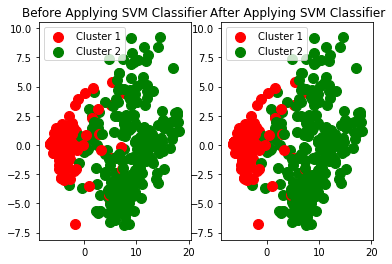

In [10]:
from sklearn import metrics
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
#import plotly.plotly as py
from sklearn.decomposition import PCA

#reading the data
data=pd.read_excel('C:/Users/PRIYAL SOBTIPRIYAL.1/Desktop/Breast_Cancer_Data.xlsx')

d = data.ix[:,0:9]

t = data.ix[:,9:]

# fit a naive bayes model to the data
model = SVC()
model.fit(d, t)



# make predictions
expected=[]
for i in t['Class']:
    expected.append(i)

predicted = model.predict(d)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print(model.score(d,t))

#Generating Graph 
fig=plt.figure()
plt1=fig.add_subplot(121)

#Applying PCA for Dimension Reduction
pca = PCA(n_components=2).fit(d)
pca_2d = pca.transform(d)

for i in range(0, pca_2d.shape[0]):

    if expected[i] == 2:
        c1 = plt1.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o' ,s=100)
    elif expected[i] == 4:
        c2 = plt1.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o', s=100)
           
plt1.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt1.set_title('Before Applying SVM Classifier')



plt2=fig.add_subplot(122)
pca = PCA(n_components=2).fit(d)
pca_2d = pca.transform(d)
for i in range(0, pca_2d.shape[0]):

    if predicted[i] == 2:
        c1 = plt2.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o' ,s=100)
    elif predicted[i] == 4:
        c2 = plt2.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o', s=100)
           
plt2.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt2.set_title('After Applying SVM Classifier')
plt.show()


In [14]:
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn import svm
import numpy as np


iris = datasets.load_iris()
print(iris.data.shape, iris.target.shape)

X=iris.data
y=iris.target
                                                        #SVM is more accurate as compared to Navie Bayes
kf = KFold(n_splits=5)
print (kf.get_n_splits(X))
print(kf)  

result=[]

for train_index, test_index in kf.split(X):
        print ("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
        result.append(clf.score(X_test, y_test))
        print (clf.score(X_test, y_test))

print("average accuray is: ", sum(result)/kf.get_n_splits(X))


(150, 4) (150,)
5
KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
1.0
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 